In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
##pip install --upgrade pandas openpyxl
##pip install openpyxl==3.0.7
##pip install --upgrade pandas

In [5]:
# List of XLSX files to merge
file_names = ['Corona-Fallmeldungen-RLP-2023-01-02.xlsx', 'Corona-Fallmeldungen-RLP-2023-01-03.xlsx', 'Corona-Fallmeldungen-RLP-2023-01-04.xlsx', 'Corona-Fallmeldungen-RLP-2023-01-05.xlsx']

# Create an empty list to store the DataFrames
dfs = []

# Iterate through each file and read the data into a DataFrame
for file in file_names:
    # Read the Excel file into a DataFrame, skipping the first two rows
    df1 = pd.read_excel(file, header=None, skiprows=3)
    
    # Append the DataFrame to the list
    dfs.append(df1)

# Concatenate the DataFrames
merged_data = pd.concat(dfs, ignore_index=True)

# Get the unique column names from the first three rows
column_names = merged_data.iloc[:3].fillna('').astype(str).apply(' '.join, axis=0).str.strip()

# Set the column names for the DataFrame
merged_data.columns = column_names

# Skip the first three rows in the merged DataFrame
merged_data = merged_data.iloc[:].reset_index(drop=True)

# Write the merged data to a new Excel file
merged_data.to_excel('merged_file.xlsx', index=False)

<ipython-input-5-73d74cc15f5d>:28: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.2.9' currently installed).
  merged_data.to_excel('merged_file.xlsx', index=False)


In [4]:
merged_data.head()

,Ahrweiler Altenkirchen Alzey-Worms,46387 50672 56450,52 72 67,1155 1400 1463,137 174 249,45503 49559 55282,747 939 919,228 308 325,223 271 237,177.9 238.3 247.5,177.9 238.3 247.4,31.1 53.7 55.1,220.0 295.1 309.4,193.3 257.6 266.4,7.29 7.29 7.29,Ahrweiler Altenkirchen Alzey-Worms
0,Ahrweiler,46387,52,1155,137,45503,747,228,223,177.9,177.9,31.1,220.0,193.3,7.29,Ahrweiler
1,Altenkirchen,50672,72,1400,174,49559,939,308,271,238.3,238.3,53.7,295.1,257.6,7.29,Altenkirchen
2,Alzey-Worms,56450,67,1463,249,55282,919,325,237,247.5,247.4,55.1,309.4,266.4,7.29,Alzey-Worms
3,Bad Dürkheim,51116,39,1298,253,50278,585,28,185,21.0,21.0,8.6,35.3,6.7,7.29,Bad Dürkheim
4,Bad Kreuznach,76040,99,831,262,74469,1309,533,264,334.4,334.3,78.2,398.5,382.8,7.29,Bad Kreuznach


### problem: merging er data
### monthly basis e graph er characteristic

In [6]:
#df = pd.read_excel(r'C:\Users\HP\Corona-Fallmeldungen-RLP-2023-01-05.xlsx')
#print(df)
#df.head(5)

Skewness:
Laborbestätigt, seit Beginn der Pandemie    5.938817
Unnamed: 2                                  5.698358
Unnamed: 3                                  5.936308
Unnamed: 4                                  5.937741
Unnamed: 5                                  5.938878
Unnamed: 6                                  5.917926
Neue Meldefälle                              5.80824
Unnamed: 8                                  5.868601
Inzidenz der letzten 7-Tage pro 100.000C    1.131395
Unnamed: 10                                  1.04349
Unnamed: 11                                 1.638389
Unnamed: 12                                 1.017906
Unnamed: 13                                 1.314721
Unnamed: 14                                      0.0
dtype: object

Kurtosis:
Laborbestätigt, seit Beginn der Pandemie    35.494574
Unnamed: 2                                  33.382141
Unnamed: 3                                  35.473445
Unnamed: 4                                  35.485226
Unnamed

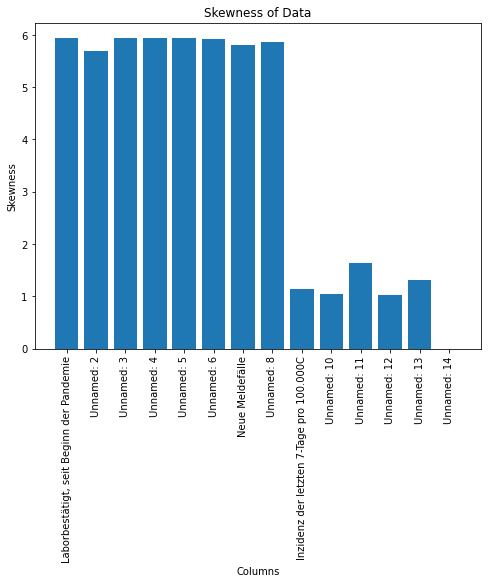

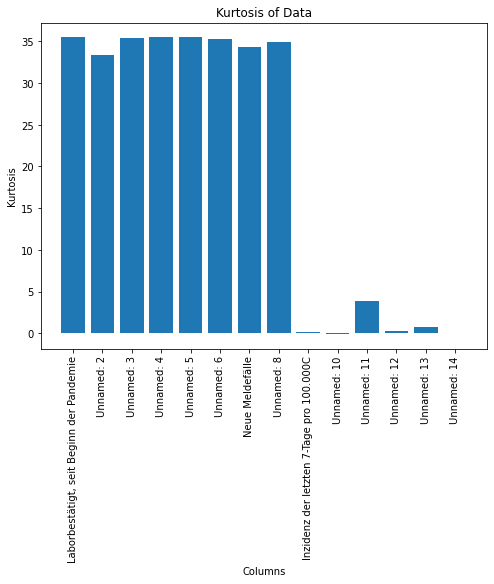

In [7]:
# Read the data into a DataFrame
data = pd.read_excel('Corona-Fallmeldungen-RLP-2023-01-05.xlsx')

# List of columns to exclude from skewness and kurtosis calculation
exclude_columns = ['Kreis, Stand 5.1.2023', 'Landkreis']

# List of rows to exclude from skewness and kurtosis calculation
exclude_rows = [0, 1, 2, 40]  # Example: Exclude first three rows

# Exclude the columns and rows from the DataFrame
data_filtered = data.drop(exclude_columns, axis=1)
data_filtered = data_filtered[~data_filtered.index.isin(exclude_rows)]

# Calculate skewness for each remaining column
skewness = data_filtered.skew()

# Calculate kurtosis for each remaining column
kurtosis = data_filtered.kurtosis()

# Print the skewness and kurtosis values
print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


# Plot skewness values
plt.figure(figsize=(8, 6))
plt.bar(skewness.index, skewness.values)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Data')
plt.xticks(rotation=90)
plt.show()

# Plot kurtosis values
plt.figure(figsize=(8, 6))
plt.bar(kurtosis.index, kurtosis.values)
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Data')
plt.xticks(rotation=90)
plt.show()

In [10]:
# Read the data into a DataFrame
data = pd.read_excel('Corona-Fallmeldungen-RLP-2023-01-05.xlsx')

# Get the values of a specific column for all rows
column_values = data['Unnamed: 3']

# Print the column values
#print(column_values)
